In [1]:
from Features import *
from AttributeRelevance import *

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/telco_churn.csv', na_values=[' '])
df['label'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [4]:
feat_gender = CategoricalFeature(df, 'gender')
feat_charges = ContinuousFeature(df, 'TotalCharges')
feat_contract = CategoricalFeature(df, 'Contract')
feat_tenure = ContinuousFeature(df, 'tenure')

In [5]:
feats = [feat_gender, feat_charges, feat_contract, feat_tenure]

In [6]:
iv = IV()
s = StatsSignificance()

In [7]:
ar = AttributeRelevance()

In [9]:
ar.analyze(feats, iv, s, interpretation=True)

,iv,p-value,effect_size,iv_interpretation,es_interpretation
Contract,1.238560,5.863038e-258,0.410116,suspicious,strong
tenure,0.852917,5.597693e-207,0.376402,suspicious,medium
TotalCharges,0.315230,1.027752e-94,0.253656,strong,medium
gender,0.000380,4.865787e-01,0.008291,useless,useless


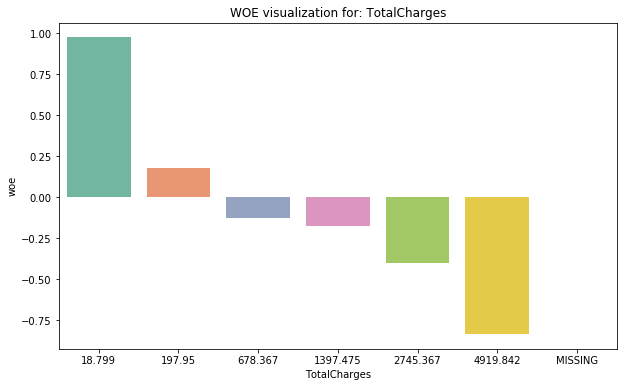

Information value: 0.32
Totalcharges is a strong predictor
P-value: 0.00
Effect size: 0.25
Totalcharges is a medium predictor


In [10]:
iv.draw_woe(feat_charges)
iv.print_iv(feat_charges)
s.print_chi(feat_charges)